In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set()

hypothesis：
1.Is there a difference in how often men and women take taxis?
2.Does the distance make a difference to the price?
3.do people use more cards or cash
4.If the young people are more likey to take taxis?
5.if the frequency for taking taxis depends on income?

In [2]:
Cab_Data = pd.read_csv(
    '/Users/yangzongkun/Desktop/DataSets/Cab_Data.csv')

Transaction_Data=pd.read_csv(
    '/Users/yangzongkun/Desktop/DataSets/Transaction_ID.csv')

Customer_Data=pd.read_csv(
    '/Users/yangzongkun/Desktop/DataSets/Customer_ID.csv')

city_Data=pd.read_csv(
    '/Users/yangzongkun/Desktop/DataSets/City.csv')


In [3]:
Cab_Data.shape

(359392, 7)

In [4]:
Transaction_Data.shape

(440098, 3)

In [5]:
Customer_Data.shape

(49171, 4)

In [6]:
city_Data

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [7]:
#merge data
Master_Data = Cab_Data.merge(Transaction_Data, on= 'Transaction ID').merge(Customer_Data, on ='Customer ID').merge(city_Data, on = 'City')

In [8]:
Master_Data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001"
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001"
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001"
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001"


In [9]:
Master_Data.info() # the overview information for the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


EDA

#numberical analysis

In [10]:
#describe
round(Master_Data.describe(include='all'),2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
count,359392.00,359392.00,359392,359392,359392.00,359392.00,359392.00,359392.00,359392,359392,359392.00,359392.00,359392,359392
unique,NaN,NaN,2,19,NaN,NaN,NaN,NaN,2,2,NaN,NaN,19,19
top,NaN,NaN,Yellow Cab,NEW YORK NY,NaN,NaN,NaN,NaN,Card,Male,NaN,NaN,"8,405,837","302,149"
freq,NaN,NaN,274681,99885,NaN,NaN,NaN,NaN,215504,205912,NaN,NaN,99885,99885
mean,10220761.19,42964.07,NaN,NaN,22.57,423.44,286.19,19191.65,NaN,NaN,35.34,15048.82,NaN,NaN
std,126805.80,307.47,NaN,NaN,12.23,274.38,157.99,21012.41,NaN,NaN,12.59,7969.41,NaN,NaN
min,10000011.00,42371.00,NaN,NaN,1.90,15.60,19.00,1.00,NaN,NaN,18.00,2000.00,NaN,NaN
25%,10110809.75,42697.00,NaN,NaN,12.00,206.44,151.20,2705.00,NaN,NaN,25.00,8424.00,NaN,NaN
50%,10221035.50,42988.00,NaN,NaN,22.44,386.36,282.48,7459.00,NaN,NaN,33.00,14685.00,NaN,NaN
75%,10330937.25,43232.00,NaN,NaN,32.96,583.66,413.68,36078.00,NaN,NaN,42.00,21035.00,NaN,NaN


Text(0.5, 0, 'Km Travelled')

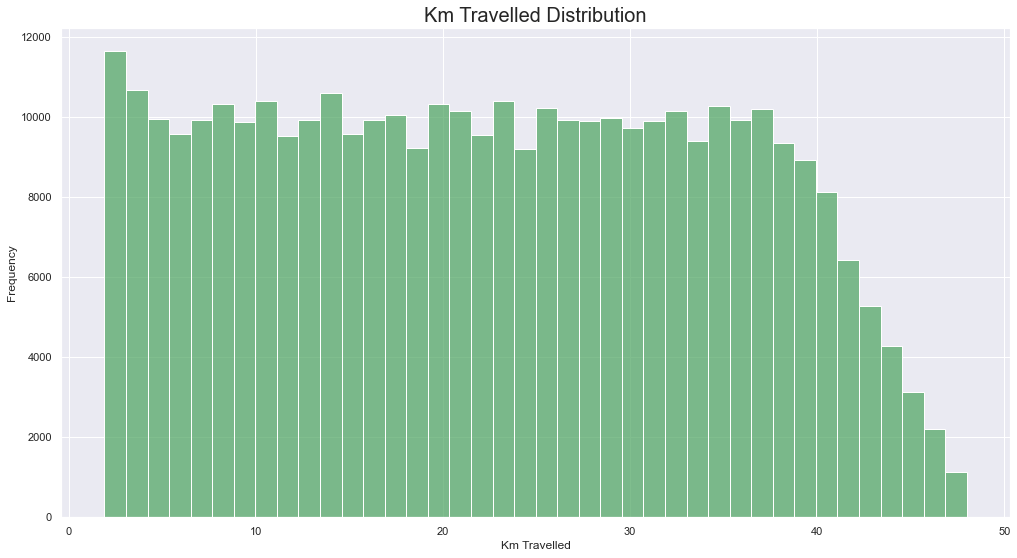

In [61]:
#KM TRAVELLED
plt.figure(figsize=(17,9))
ax=sns.histplot(data=Master_Data, x="KM Travelled",bins=40, color= 'g')
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')

Text(0.5, 0, 'Price Charged')

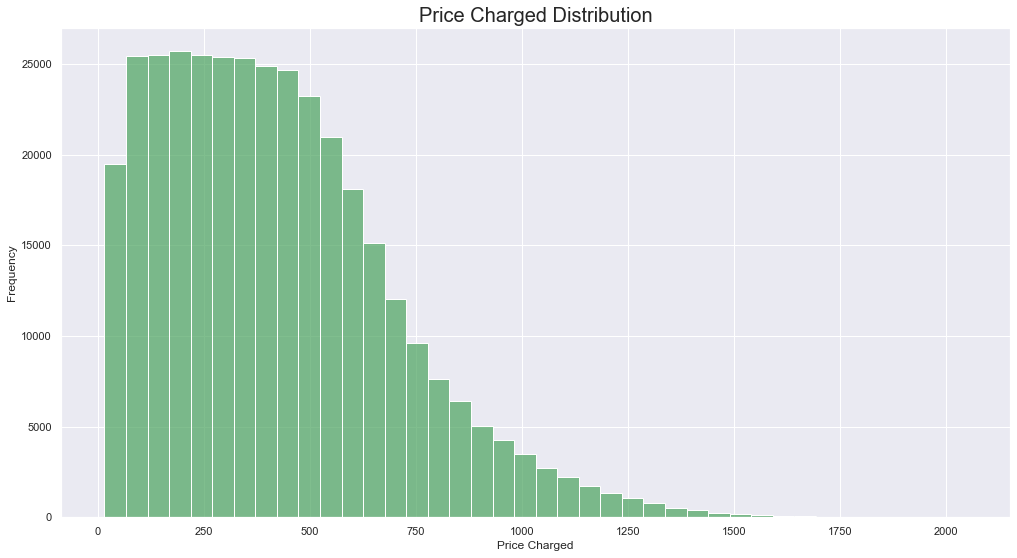

In [62]:
#Price Charged

plt.figure(figsize=(17,9))
ax=sns.histplot(data=Master_Data, x="Price Charged",bins=40,color= 'g')
plt.title('Price Charged Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Price Charged')

Text(0.5, 0, 'Cost of Trip')

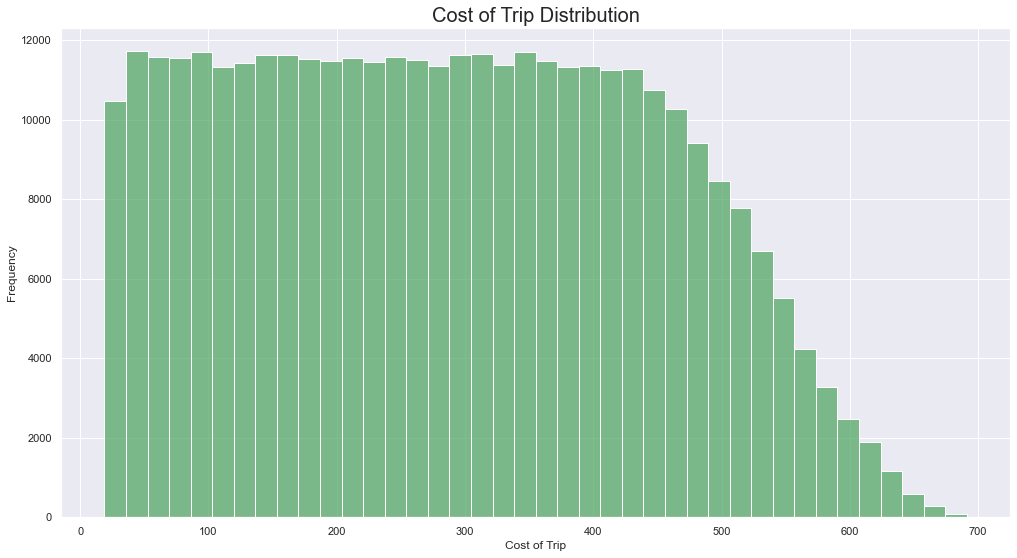

In [65]:
#Cost of Trip	

plt.figure(figsize=(17,9))
ax=sns.histplot(data=Master_Data, x="Cost of Trip",bins=40,color= 'g')
plt.title('Cost of Trip Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Cost of Trip')

Text(0.5, 0, 'Age')

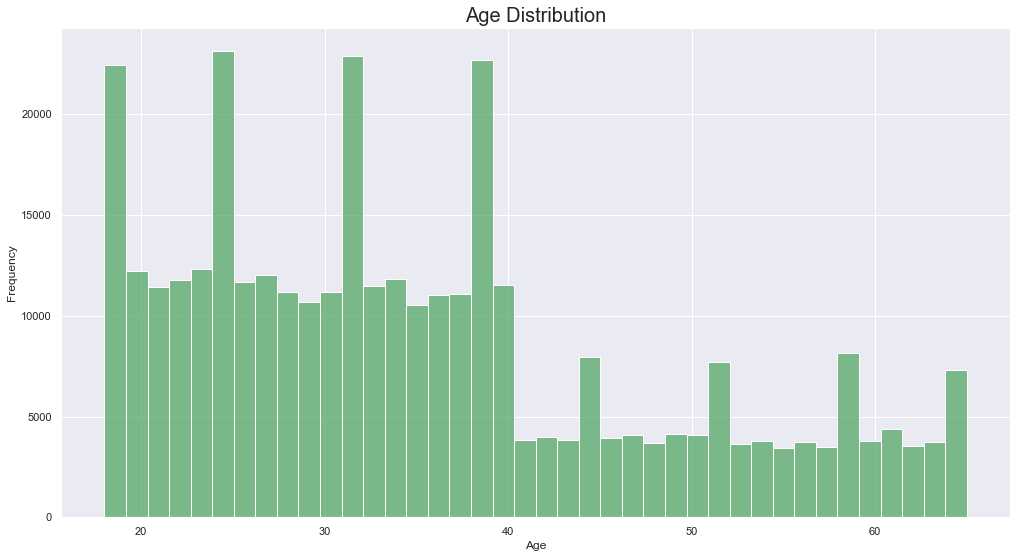

In [67]:
#Age
plt.figure(figsize=(17,9))
ax=sns.histplot(data=Master_Data, x="Age",bins=40,color= 'g')
plt.title('Age Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Age')

Text(0.5, 0, 'Income (USD/Month)')

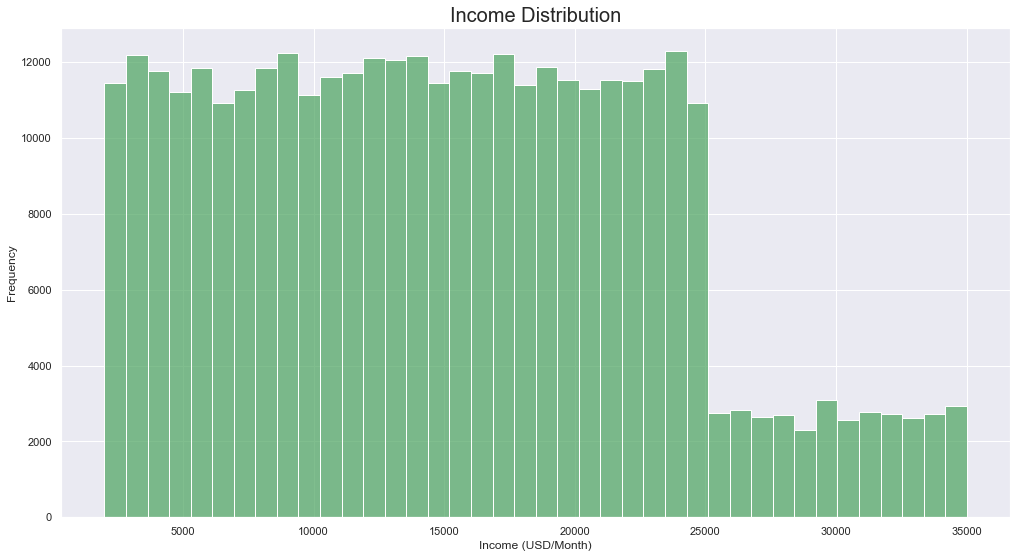

In [69]:
#Income (USD/Month)
plt.figure(figsize=(17,9))
ax=sns.histplot(data=Master_Data, x="Income (USD/Month)",bins=40,color= 'g')
plt.title('Income Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Income (USD/Month)')

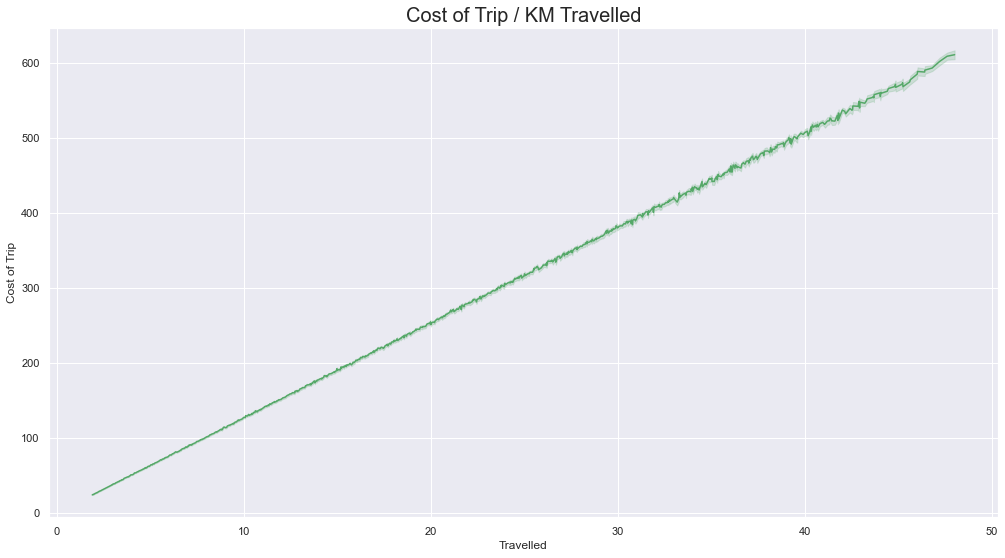

In [66]:
#COST per KM

plt.figure(figsize=(17,9))
sns.lineplot(data=Master_Data, x="KM Travelled",y='Cost of Trip', color= 'g')
plt.title('Cost of Trip / KM Travelled', fontsize=20)
plt.xlabel('Travelled')
plt.ylabel('Cost of Trip')
plt.show()

#categorical analysis

Text(0.5, 0, 'Gender')

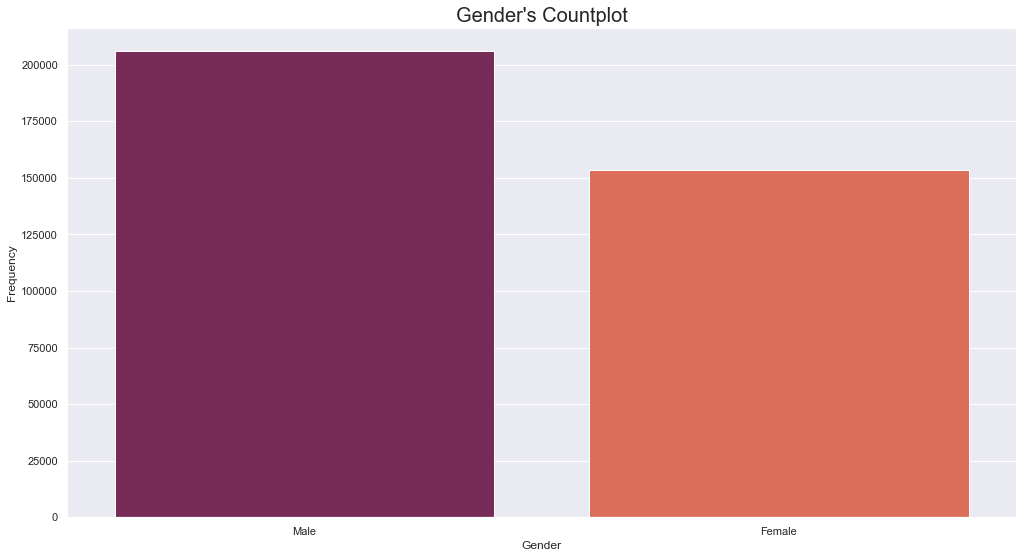

In [43]:
# gender
plt.figure(figsize=(17,9))
sns.countplot(data=Master_Data, x="Gender", palette='rocket')
plt.title("Gender's Countplot", fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Gender')

Text(0.5, 0, 'Payment Mode')

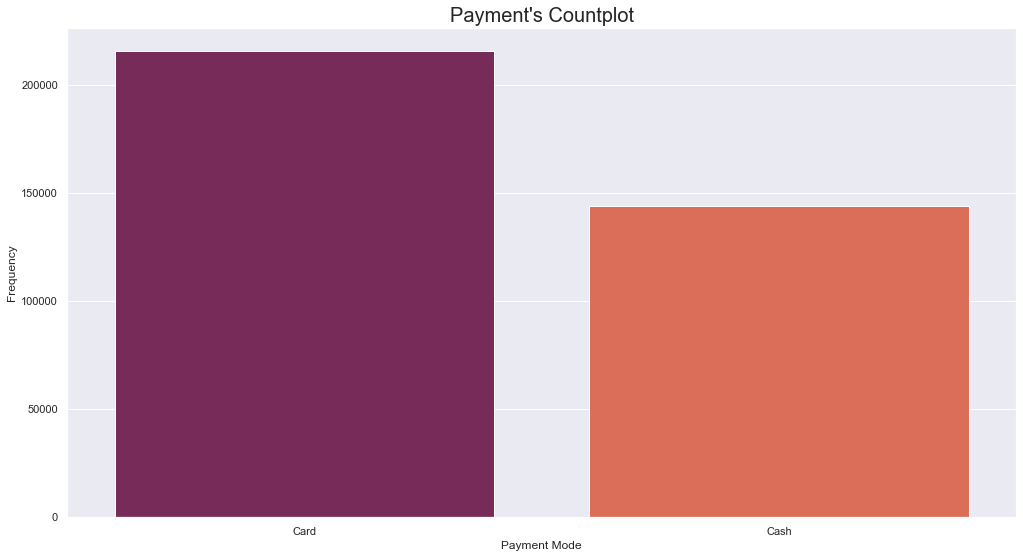

In [44]:
#payment_mode
plt.figure(figsize=(17,9))
sns.countplot(data=Master_Data, x="Payment_Mode", palette='rocket')
plt.title("Payment's Countplot", fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Payment Mode')

Text(0.5, 0, 'city')

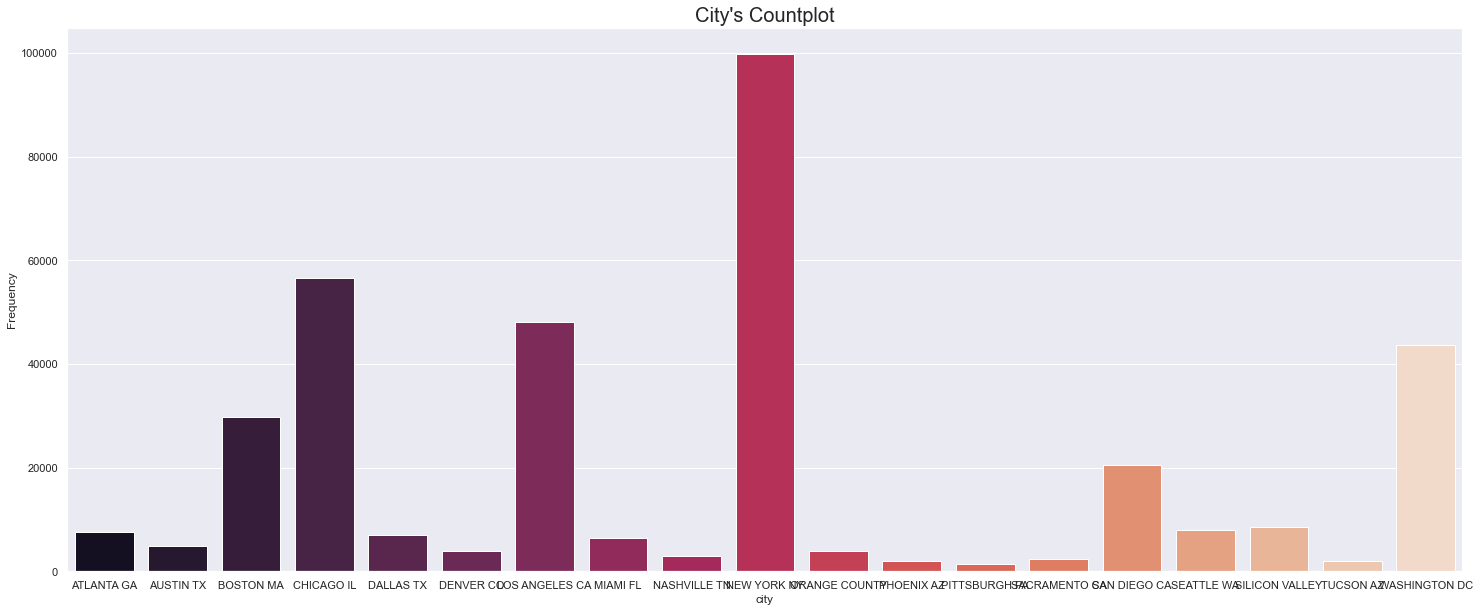

In [56]:
#City
plt.figure(figsize=(25,10))
sns.countplot(data=Master_Data, x="City", palette='rocket')
plt.title("City's Countplot", fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('city')


Text(0.5, 0, 'Company')

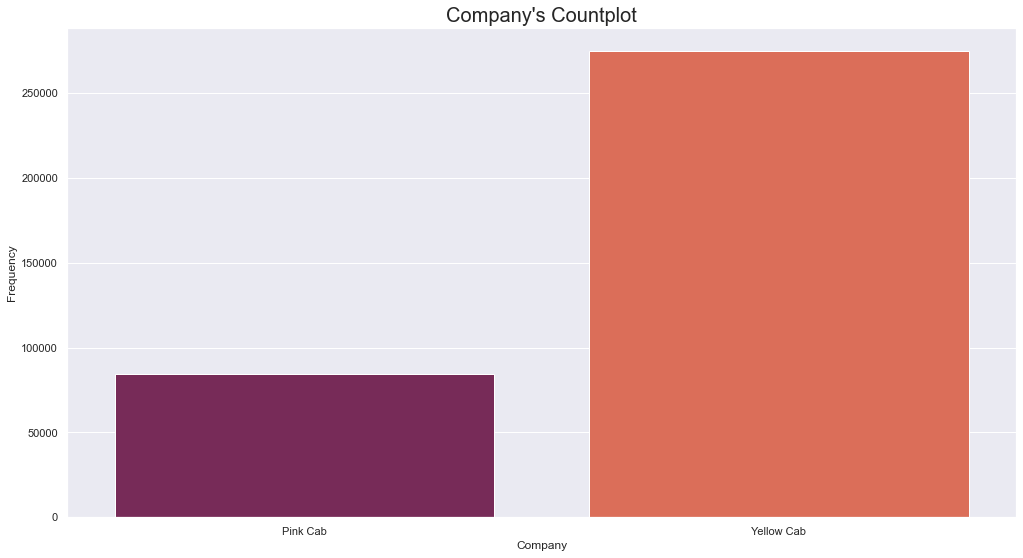

In [57]:
#Company
plt.figure(figsize=(17,9))
sns.countplot(data=Master_Data, x="Company", palette='rocket')
plt.title("Company's Countplot", fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Company')


#CORRELATIONS

In [70]:
Master_Data.corr()


,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
Transaction ID,1.000000,0.993030,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570
Date of Travel,0.993030,1.000000,-0.001621,-0.055559,-0.004484,-0.017653,-0.001346,-0.001368
KM Travelled,-0.001429,-0.001621,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544
Price Charged,-0.052902,-0.055559,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228
Cost of Trip,-0.003462,-0.004484,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633
Customer ID,-0.016912,-0.017653,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608
Age,-0.001267,-0.001346,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907
Income (USD/Month),-0.001570,-0.001368,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000


Check Data Type

In [72]:
Master_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [71]:
Master_Data.dtypes


Transaction ID          int64
Date of Travel          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Population             object
Users                  object
dtype: object

In [80]:
Master_Data['Income (USD/Month)'] = Master_Data['Income (USD/Month)'].astype(float)

Master_Data.dtypes

Transaction ID          int64
Date of Travel          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)    float64
Population             object
Users                  object
dtype: object

In [81]:
#Missing Values
Master_Data.apply(lambda x: sum(x.isnull()),axis=0)


Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [82]:
#Check Duplicates
duplicated_rows = Master_Data[Master_Data.duplicated()]
print('The number of duplicated rows', duplicated_rows.shape[0])

The number of duplicated rows 0


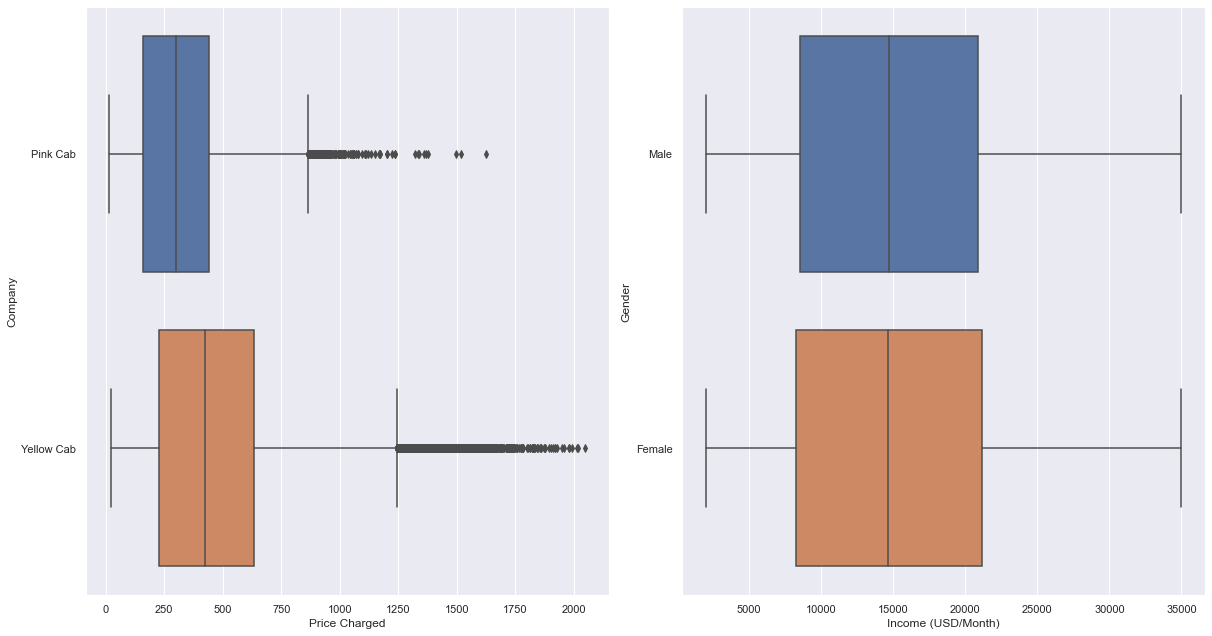

In [83]:
#check outliers
plt.figure(figsize=(17,9))

plt.subplot(1,2,1)
sns.boxplot(data = Master_Data, y = 'Company', x = "Price Charged", dodge=False)

plt.subplot(1,2,2)
sns.boxplot(data = Master_Data, y = 'Gender', x = "Income (USD/Month)", dodge=False)

plt.tight_layout()
plt.show()

#outliers are present in the Price Charged feature, but as we do not have any further information, so I Will leave it

conclusion：

1.Is there a difference in how often men and women take taxis?
Yes, males are more likely to take taxis
 
2.Does the distance make a difference to the price?
No,it's more likely the same price
 
3.do people use more cards or cash?
yes, more people like to pay with cards
 
4.If the young people are more likely to take taxis?
yes，especially the people less than 40
 
5.if the frequency for taking taxis depends on income?
Yes.the people whose income is less than 25000/month are more likely to take taxis
